> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 2

**Handin in Peergrade**: *Monday*, October 21, 2019, 23:59<br>
**Peergrading deadline**: *Friday*, October 25, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, October 27, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 4

> **Ex. 4.3.2**: Implement cross validation. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. It's important that you comment on the result.

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data.
* Create a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments.
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

### Week 5

>**Ex. 5.1.3**: Print the maximum entropy path of a decision tree.
>
>1. Implement the following pseudocode and print the output:<br><br>
>Step 1. Find `team` that gives lowest split entropy for `data`. Print `team`.<br>
>Step 2. Split `data` on `team`, to produce `data0` and `data1`. Print the entropy of each, as well as their weighted avg. entropy.<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.2.3.1.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How splits are there? Do you notice anything interesting about the final splits? Why do we choose to stop splitting before `data` get smaller than 5?
>3. Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of the order of splits you just printed (a comment is fine)?

### Week 6

> **Ex. 6.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

[1, 2, 3, 4]
[(1, 2), (1, 3), (1, 4), (3, 4)]


/home/dalbosta/anaconda3/envs/conda_env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


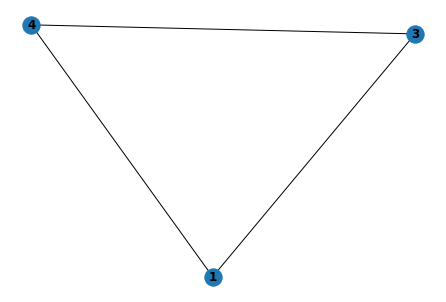

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (1,4), (3,4)])

print(G.nodes)
print(G.edges)

G.remove_node(2)

nx.draw(G, with_labels=True, font_weight='bold')

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?
>
> The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. The network begins with an initial connected network of $m_0$ nodes.
New nodes are added to the network one at a time. Each new node is connected to $m \leq m_0$ existing nodes with a probability that is proportional to the number of links that the existing nodes already have. 


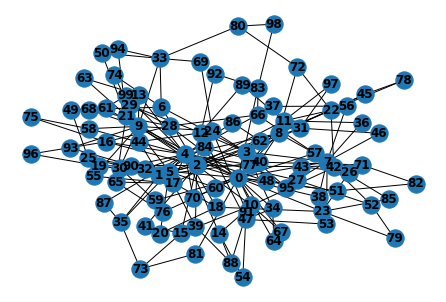

In [4]:
#generate and plot BA network
ba = nx.barabasi_albert_graph(100, 2)
nx.draw(ba, with_labels=True, font_weight='bold')

Text(0.5, 0, 'degree')

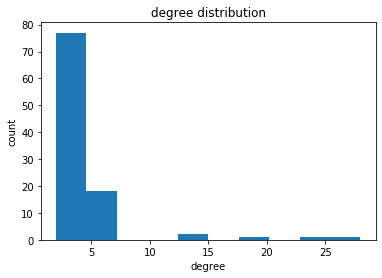

In [3]:
#obtain list of all node degrees
deg_list = []
nodes = []

for i in ba.degree:
    deg_list.append(i[1])
    nodes.append(i[0])
    
plt.hist(deg_list)
plt.title("degree distribution")
plt.ylabel('count')
plt.xlabel('degree')

> The BA graph is tail heavy when compared to the ER graph, which has a more even distribution
>
> Other methods of comparing the two networks could be to look at the number of strongly connected nodes and the shortest paths between each nodes

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

In [6]:
#helper method
import re, os

def get_partners(char, faction=None):
    """Return list of alliances for Marvel character."""
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("./data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()
        
    # Get partners field
    partners_field = re.findall(r"\| *partners[\w\W]+?\|.+=", markup)
    if partners_field == []:
        return []
 
    # Extract links from partners field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0])]

In [8]:
#DATA FOLDER MUST BE IN SAME DIRECTORY AS THIS FILE
#prepare data for graph

valid_chars=[]
valid_chars = set(valid_chars)


#add valid chars that have at least dim 1 to set
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]    
   
    for char in faction_chars:
        if len(get_partners(char)) != 0:
            valid_chars.add(char)
            
            
invalid_chars = []
invalid_chars = set(invalid_chars)

#remove chars with partners not in faction
for char in valid_chars:
    for partner in get_partners(char):
        if partner not in valid_chars:
            invalid_chars.add(partner)

valid_chars = valid_chars - invalid_chars

In [9]:
#build graph
marvel_partners = nx.Graph()

#add nodes
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
    
    for char in faction_chars:
        if char in valid_chars:
            #append faction label to node
            marvel_partners.add_node(char,faction_label=faction)

#add edges
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
    
    for char in faction_chars:
        partners = get_partners(char)
        if len(partners) != 0:
            for p in partners:
                if p in valid_chars:
                    marvel_partners.add_edge(char,p)
    

#remove nodes with no partners
isolated = list(nx.isolates(marvel_partners))
marvel_partners.remove_nodes_from(isolated) 

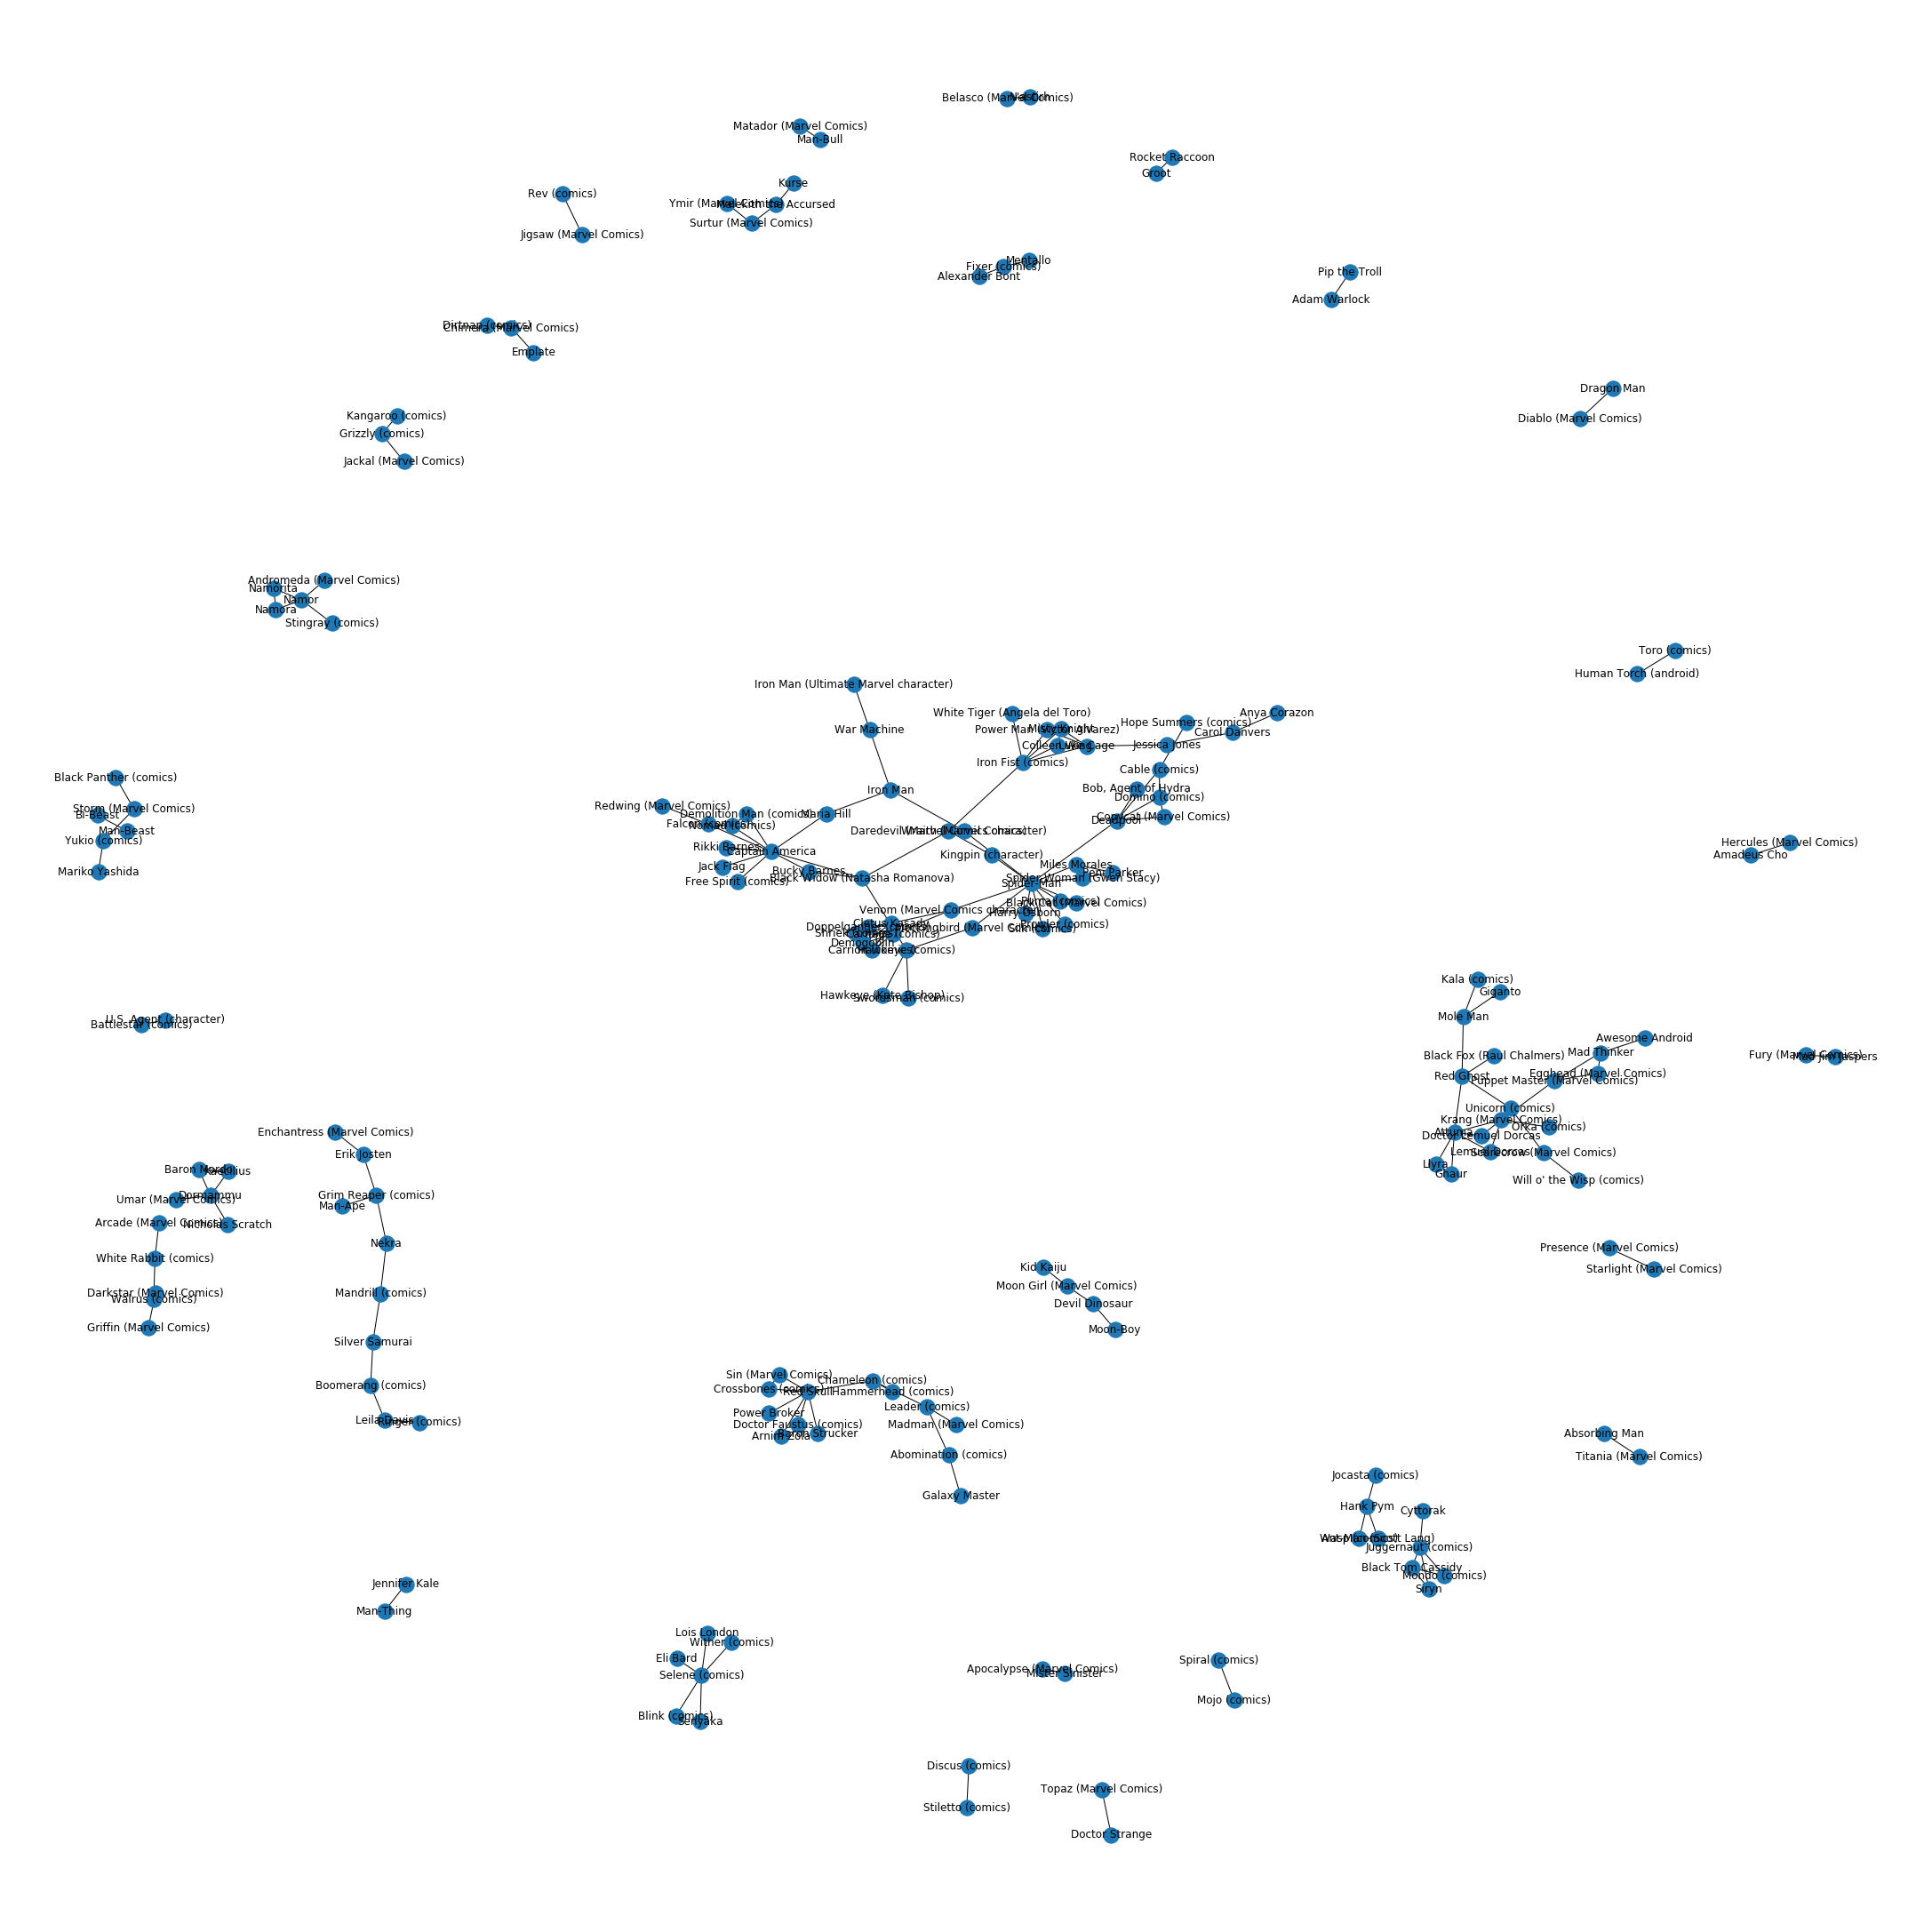

In [10]:
#plot graph
plt.figure (figsize =(30,30))
nx.draw(marvel_partners, with_labels=True)

> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

Text(0.5, 0, 'degree')

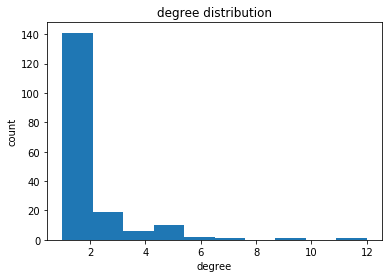

In [11]:
#grab degrees of all nodes
deg_list = []

for i in marvel_partners.degree:
    deg_list.append(i[1])

plt.figsize =(30,60)
plt.hist(deg_list)
plt.title("degree distribution")
plt.ylabel('count')
plt.xlabel('degree')

> This is similar to the BA network since the distribution is tail heavy

> **Ex: 6.2.7**: Let's make a nice plot of the network.I built a Python library called Netwulf (go `pip install netwulf`) that allows you to interactively plot networks in Python. Go ahead and produce a beautiful looking network using that! Comment on what you see.

In [ ]:
import networkx as nx
from netwulf import visualize

visualize(marvel_partners)